<a href="https://colab.research.google.com/github/jairthecreator/Machine-Learning-Project/blob/main/Module_5_Midterm_Project_1_Jair_Herrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Tree**



In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#retrieve dataset that will be used in project
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/MSDA 665 Data/diabetes_risk_prediction_dataset.csv")



Mounted at /content/drive


In [ ]:
#show information on the dataset
print(df.describe())
print(df.info())


              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden Weight Loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital Thrush      520 non-null    object
 8   Visual Blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed Healing     520 non-null    object
 12  Partial Paresis     520 non-null    object
 13  Muscle S

In [ ]:
# Independent variables Xs
X = df[['Age','Gender', 'Polyuria', 'Polydipsia','Sudden Weight Loss','Weakness','Polyphagia','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Alopecia','Obesity']]

#Target variable (dependent variable Y)
y = df['Class']

In [ ]:
# get_dummies(X): code categorical variables
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,Weakness_Yes,Polyphagia_Yes,Genital Thrush_Yes,Visual Blurring_Yes,Itching_Yes,Irritability_Yes,Delayed Healing_Yes,Partial Paresis_Yes,Muscle Stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
# get_dummies(y): code categorical variables, 1 = "Positive" and 0 = "Negative" for diabetes
y = pd.get_dummies(data=y, drop_first=True)
y.tail()

,Positive
515,1
516,1
517,1
518,0
519,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9134615384615384


Text(0.5, 427.9555555555555, 'Predicted label')

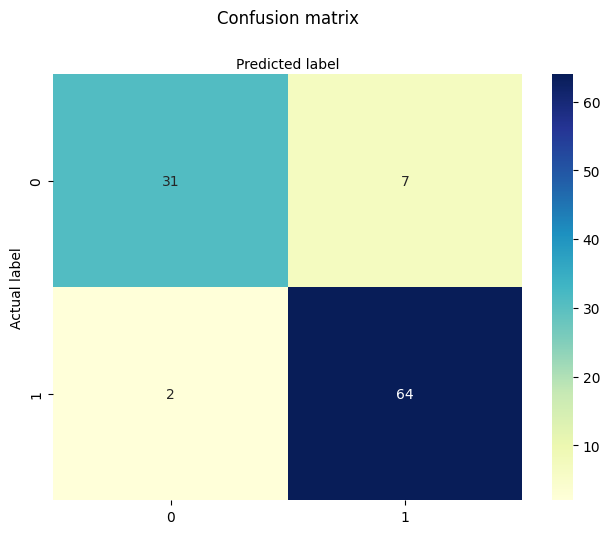

In [ ]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# create the confusion matrix;
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

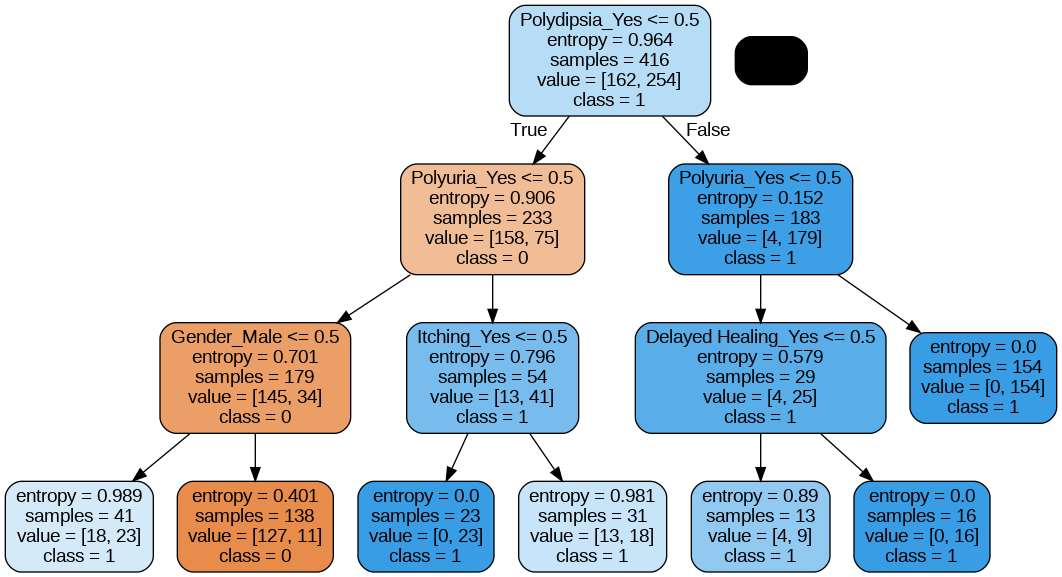

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

feature_cols = X.columns
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
            filled=True, rounded=True,
            feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Class.png')
Image(graph.create_png())

## **Association** **Rules**

In [ ]:
#retrieve dataset that will be used in project
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/MSDA 665 Data/diabetes_risk_prediction_dataset.csv")

#import functions
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

df_AR = df[['Class','Gender', 'Polyuria', 'Polydipsia','Sudden Weight Loss','Visual Blurring','Delayed Healing','Obesity']]
display(df_AR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Class,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Visual Blurring,Delayed Healing,Obesity
0,Positive,Male,No,Yes,No,No,Yes,Yes
1,Positive,Male,No,No,No,Yes,No,No
2,Positive,Male,Yes,No,No,No,Yes,No
3,Positive,Male,No,No,Yes,No,Yes,No
4,Positive,Male,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...
515,Positive,Female,Yes,Yes,Yes,No,Yes,No
516,Positive,Female,Yes,Yes,Yes,No,Yes,No
517,Positive,Female,Yes,Yes,Yes,Yes,No,Yes
518,Negative,Female,No,No,No,Yes,Yes,No


In [ ]:
# identify the categorical variables in the dataset
categorical_vars = ['Class','Gender', 'Polyuria', 'Polydipsia','Sudden Weight Loss','Visual Blurring','Delayed Healing','Obesity']

# encode the categorical variables using one-hot encoding
dr_AR = pd.get_dummies(df_AR, columns=categorical_vars)
print(dr_AR)

     Class_Negative  Class_Positive  Gender_Female  Gender_Male  Polyuria_No  \
0                 0               1              0            1            1   
1                 0               1              0            1            1   
2                 0               1              0            1            0   
3                 0               1              0            1            1   
4                 0               1              0            1            0   
..              ...             ...            ...          ...          ...   
515               0               1              1            0            0   
516               0               1              1            0            0   
517               0               1              1            0            0   
518               1               0              1            0            1   
519               1               0              0            1            1   

     Polyuria_Yes  Polydipsia_No  Polyd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(dr_AR, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# filter the rules
min_confidence = 0.5
min_lift = 1.0
filtered_rules = rules[(rules['confidence'] > min_confidence) & (rules['lift'] > min_lift)]
filtered_rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 3)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sort the rules based on lift in descending order
sorted_rules = filtered_rules.sort_values(by='lift', ascending=False)
# Filter the association rules that have four or more items
filtered_rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 4)]
# Print the sorted rules
display(sorted_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10017,"(Polyuria_No, Polydipsia_No, Gender_Male, Dela...","(Visual Blurring_No, Class_Negative, Sudden We...",0.180769,0.228846,0.150000,0.829787,3.625961,0.108632,4.530529,0.884013
10176,"(Visual Blurring_No, Class_Negative, Sudden We...","(Polyuria_No, Polydipsia_No, Gender_Male, Dela...",0.228846,0.180769,0.150000,0.655462,3.625961,0.108632,2.377767,0.939127
10187,"(Obesity_No, Visual Blurring_No, Class_Negative)","(Polyuria_No, Polydipsia_No, Sudden Weight Los...",0.236538,0.180769,0.150000,0.634146,3.508044,0.107241,2.239231,0.936446
10006,"(Polyuria_No, Polydipsia_No, Sudden Weight Los...","(Obesity_No, Visual Blurring_No, Class_Negative)",0.180769,0.236538,0.150000,0.829787,3.508044,0.107241,4.485337,0.872698
10174,"(Delayed Healing_No, Class_Negative, Sudden We...","(Polyuria_No, Polydipsia_No, Gender_Male, Obes...",0.188462,0.226923,0.150000,0.795918,3.507437,0.107234,3.788077,0.880909
...,...,...,...,...,...,...,...,...,...,...
2006,"(Gender_Male, Obesity_No, Class_Positive)",(Delayed Healing_No),0.223077,0.540385,0.121154,0.543103,1.005031,0.000607,1.005951,0.006444
4249,"(Gender_Male, Delayed Healing_Yes, Polydipsia_...",(Obesity_No),0.138462,0.830769,0.115385,0.833333,1.003086,0.000355,1.015385,0.003571
3525,"(Delayed Healing_Yes, Visual Blurring_Yes, Pol...",(Obesity_No),0.150000,0.830769,0.125000,0.833333,1.003086,0.000385,1.015385,0.003620
2002,"(Gender_Male, Obesity_No, Class_Positive)",(Visual Blurring_Yes),0.223077,0.448077,0.100000,0.448276,1.000444,0.000044,1.000361,0.000571
